#### Daven Air Quality Analysis

In [18]:
# import the needed library
# type: ignore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


###  Importing the data

In [19]:
# reading the csv file for Tuen Mun months
DavenPort_Jan_June_2024= pd.read_csv('Daven PortAir Quality Analysis_data.csv.')
DavenPort_Jan_June_2024

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,2166,"Davenport,USA",co,114.56,µg/m³,2023-12-31 01:00:00+00:00,2023-12-30 19:00:00-06:00,America/Chicago,41.529999,-90.587502,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
1,2166,"Davenport,USA",o3,27.48,µg/m³,2023-12-31 01:00:00+00:00,2023-12-30 19:00:00-06:00,America/Chicago,41.529999,-90.587502,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
2,2166,"Davenport,USA",pm25,6.90,µg/m³,2023-12-31 01:00:00+00:00,2023-12-30 19:00:00-06:00,America/Chicago,41.529999,-90.587502,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
3,2166,"Davenport,USA",co,114.56,µg/m³,2023-12-31 02:00:00+00:00,2023-12-30 20:00:00-06:00,America/Chicago,41.529999,-90.587502,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
4,2166,"Davenport,USA",o3,29.45,µg/m³,2023-12-31 02:00:00+00:00,2023-12-30 20:00:00-06:00,America/Chicago,41.529999,-90.587502,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29808,2166,"Davenport,USA",pm25,2.30,µg/m³,2024-06-30 20:00:00+00:00,2024-06-30 15:00:00-05:00,America/Chicago,41.529999,-90.587502,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
29809,2166,"Davenport,USA",pm25,2.40,µg/m³,2024-06-30 21:00:00+00:00,2024-06-30 16:00:00-05:00,America/Chicago,41.529999,-90.587502,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
29810,2166,"Davenport,USA",pm25,2.30,µg/m³,2024-06-30 22:00:00+00:00,2024-06-30 17:00:00-05:00,America/Chicago,41.529999,-90.587502,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
29811,2166,"Davenport,USA",pm25,2.40,µg/m³,2024-06-30 23:00:00+00:00,2024-06-30 18:00:00-05:00,America/Chicago,41.529999,-90.587502,NaN,NaN,NaN,Unknown Governmental Organization,AirNow


### Describing the data.

In [20]:
# showing the shape of the dataset
print(f'The Tuen Mun dataset is made up of{DavenPort_Jan_June_2024.shape}')

# showing the information about the dataset.
DavenPort_Jan_June_2024.info()

The Tuen Mun dataset is made up of(29813, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29813 entries, 0 to 29812
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    29813 non-null  int64  
 1   location_name  29813 non-null  object 
 2   parameter      29813 non-null  object 
 3   value          29813 non-null  float64
 4   unit           29813 non-null  object 
 5   datetimeUtc    29813 non-null  object 
 6   datetimeLocal  29813 non-null  object 
 7   timezone       29813 non-null  object 
 8   latitude       29813 non-null  float64
 9   longitude      29813 non-null  float64
 10  country_iso    0 non-null      float64
 11  isMobile       0 non-null      float64
 12  isMonitor      0 non-null      float64
 13  owner_name     29813 non-null  object 
 14  provider       29813 non-null  object 
dtypes: float64(6), int64(1), object(8)
memory usage: 3.4+ MB


#### Data Cleaning

In [21]:
# drop the unnecessary columns
"""
Cell generated by Data Wrangler.
"""
def clean_data(DavenPort_Jan_June_2024):
    # Drop column: 'country_iso'
    DavenPort_Jan_June_2024 = DavenPort_Jan_June_2024.drop(columns=['country_iso'])
    # Drop column: 'isMobile'
    DavenPort_Jan_June_2024 = DavenPort_Jan_June_2024.drop(columns=['isMobile'])
    # Drop column: 'isMonitor'
    DavenPort_Jan_June_2024 = DavenPort_Jan_June_2024.drop(columns=['isMonitor'])
    # Drop column: 'owner_name'
    DavenPort_Jan_June_2024 = DavenPort_Jan_June_2024.drop(columns=['owner_name'])
    # Drop column: 'provider'
    DavenPort_Jan_June_2024 = DavenPort_Jan_June_2024.drop(columns=['provider'])
    return DavenPort_Jan_June_2024

DavenPort_Jan_June_2024 = clean_data(DavenPort_Jan_June_2024.copy())
DavenPort_Jan_June_2024.head()

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude
0,2166,"Davenport,USA",co,114.56,µg/m³,2023-12-31 01:00:00+00:00,2023-12-30 19:00:00-06:00,America/Chicago,41.529999,-90.587502
1,2166,"Davenport,USA",o3,27.48,µg/m³,2023-12-31 01:00:00+00:00,2023-12-30 19:00:00-06:00,America/Chicago,41.529999,-90.587502
2,2166,"Davenport,USA",pm25,6.90,µg/m³,2023-12-31 01:00:00+00:00,2023-12-30 19:00:00-06:00,America/Chicago,41.529999,-90.587502
3,2166,"Davenport,USA",co,114.56,µg/m³,2023-12-31 02:00:00+00:00,2023-12-30 20:00:00-06:00,America/Chicago,41.529999,-90.587502
4,2166,"Davenport,USA",o3,29.45,µg/m³,2023-12-31 02:00:00+00:00,2023-12-30 20:00:00-06:00,America/Chicago,41.529999,-90.587502


In [22]:
# checking for duplicate values
dup = DavenPort_Jan_June_2024.duplicated().sum()
print(f'The number of duplicated values is: {dup}')

# converting datetime for Utc and Local to datetime format
DavenPort_Jan_June_2024['datetimeUtc'] = pd.to_datetime(DavenPort_Jan_June_2024['datetimeUtc'])
DavenPort_Jan_June_2024['datetimeLocal'] = pd.to_datetime(DavenPort_Jan_June_2024['datetimeLocal'])

The number of duplicated values is: 12886


### Descriptive statistics

#This will focus on the basic descriptive statistics for the pollutants. This will include the mean, mode, median, maximum value and the minimum value as well as the quartiles

In [23]:
# creating a pivot table
DavenPort_Table= DavenPort_Jan_June_2024.pivot_table(
    values='value',
    index=['datetimeLocal', 'datetimeUtc'],
    columns='parameter'
)
# resetting the index for readability
DavenPort_Table.reset_index(inplace=True)

# filling the missing value with 0
DavenPort_Table= DavenPort_Table.fillna(0)

# describing the DavenPort_Table
desc = [DavenPort_Table['co'].describe(),DavenPort_Table['o3'].describe(),DavenPort_Table['no2'].describe(),DavenPort_Table['no2'].describe()]
desc = pd.DataFrame(desc)
print("The descriptive statistics for the pollutants is:", '\n', desc)

# displaying the first 5 obs.
DavenPort_Table.head()

The descriptive statistics for the pollutants is: 
       count        mean        std   min     25%     50%     75%      max
co   4350.0  189.496232  91.236191  0.00  114.56  229.12  229.12  1260.16
o3   4350.0   59.950995  29.189544 -1.96   41.23   62.82   80.49   143.31
no2  4350.0    8.589039   9.076164  0.00    3.20    6.21   10.91    69.62
no2  4350.0    8.589039   9.076164  0.00    3.20    6.21   10.91    69.62


parameter,datetimeLocal,datetimeUtc,co,no2,o3,pm25
0,2023-12-30 19:00:00-06:00,2023-12-31 01:00:00+00:00,114.56,0.0,27.48,6.9
1,2023-12-30 20:00:00-06:00,2023-12-31 02:00:00+00:00,114.56,0.0,29.45,7.0
2,2023-12-30 21:00:00-06:00,2023-12-31 03:00:00+00:00,114.56,0.0,35.34,7.9
3,2023-12-30 22:00:00-06:00,2023-12-31 04:00:00+00:00,114.56,0.0,33.37,8.2
4,2023-12-30 23:00:00-06:00,2023-12-31 05:00:00+00:00,114.56,0.0,35.34,8.5


### Calculating The Air Quality Index For Each Parameter and the Total AQI

In [24]:
# create a breakpoint dictionary
breakpoints = {
    'pm25': [(0.0, 42.0, 0, 50), (42.1, 84.0, 51, 100), (84.1, 126.0, 101, 150), (126.1, 168.0, 151, 200), (168.1, 210.0, 201, 300)],
    'no2': [(0.0, 54.0, 0, 50), (55.1, 154.0, 51, 100), (155.0, 254.0, 101, 150), (255.0, 354.0, 151, 200), (355.0, 424.0, 201, 300)],
    'o3': [(0.0, 26.67, 0, 50), (26.68, 53.33, 51, 100), (53.34, 80.0, 101, 150), (80.01, 106.67, 151, 200), (106.68, 133.33, 201, 300), (133.34, 160.0, 301, 500)],
    'co': [(0.0, 138.3, 0, 50), (138.4, 276.6, 51, 100), (276.7, 414.9, 101, 150), (415.0, 553.2, 151, 200), (553.3, 691.5, 201, 300), (691.6, 830.0, 301, 500)]
}
# declare a function calculate_aqi
def calculate_aqi(concentration, breakpoints):
    for bp in breakpoints:
        if bp[0] <= concentration <= bp[1]:
            return (bp[3] - bp[2]) / (bp[1] - bp[0]) * (concentration - bp[0]) + bp[2]
    return None
# Sample DataFrame with pollutant concentrations
data = {
    'datetimeUtc': pd.date_range(start='2024-01-01', periods=4368, freq='h'),
    'o3': np.random.uniform(0, 0.2, 4368),
    'co': np.random.uniform(0, 15, 4368),
    'pm25': np.random.uniform(0, 250, 4368),
    'no2': np.random.uniform(0, 430, 4368)
}
Davenport_Aqi = pd.DataFrame(data)

# Calculate AQI for each pollutant
Davenport_Aqi['AQI_o3'] = Davenport_Aqi['o3'].apply(lambda x: calculate_aqi(x, breakpoints['o3']))
Davenport_Aqi['AQI_co'] = Davenport_Aqi['co'].apply(lambda x: calculate_aqi(x, breakpoints['co']))
Davenport_Aqi['AQI_pm25'] = Davenport_Aqi['pm25'].apply(lambda x: calculate_aqi(x, breakpoints['pm25']))
Davenport_Aqi['AQI_no2'] = Davenport_Aqi['no2'].apply(lambda x: calculate_aqi(x, breakpoints['no2']))

# Calculate overall AQI as the maximum of individual AQIs
Davenport_Aqi['AQI'] = Davenport_Aqi[['AQI_o3', 'AQI_co', 'AQI_pm25', 'AQI_no2']].max(axis=1)

# filling the missing values with the mean
Davenport_Aqi.fillna(value=Davenport_Aqi.mean())

# setting datetimeUtc as index
Davenport_Aqi.set_index(Davenport_Aqi['datetimeUtc'], inplace=True)
Davenport_Aqi.tail(10)

,datetimeUtc,o3,co,pm25,no2,AQI_o3,AQI_co,AQI_pm25,AQI_no2,AQI
datetimeUtc,,,,,,,,,,
2024-06-30 14:00:00,2024-06-30 14:00:00,0.151621,14.199624,223.809685,378.307159,0.284254,5.133631,NaN,234.440706,234.440706
2024-06-30 15:00:00,2024-06-30 15:00:00,0.111765,0.546252,11.431267,375.214118,0.209533,0.197488,13.608651,230.002866,230.002866
2024-06-30 16:00:00,2024-06-30 16:00:00,0.011105,7.055285,139.210625,207.826907,0.020820,2.550718,166.332235,127.146651,166.332235
2024-06-30 17:00:00,2024-06-30 17:00:00,0.062684,4.548293,39.352615,185.579987,0.117517,1.644357,46.848351,116.135549,116.135549
2024-06-30 18:00:00,2024-06-30 18:00:00,0.186671,3.951662,113.837318,86.797315,0.349964,1.428656,135.776338,66.704433,135.776338
2024-06-30 19:00:00,2024-06-30 19:00:00,0.164067,4.617227,24.128009,115.415239,0.307588,1.669280,28.723820,80.883182,80.883182
2024-06-30 20:00:00,2024-06-30 20:00:00,0.070467,5.888777,65.021030,310.637101,0.132108,2.128986,77.805024,178.537555,178.537555
2024-06-30 21:00:00,2024-06-30 21:00:00,0.083963,4.092754,191.552534,66.204228,0.157412,1.479665,256.412908,56.501589,256.412908
2024-06-30 22:00:00,2024-06-30 22:00:00,0.169033,10.599413,124.902059,18.673918,0.316897,3.832037,148.716012,17.290665,148.716012


#### Exploratory Data analysis

Here, we will compare the level of AQI for each pollutant in for each hour.

We will then resample the data to a daily and monthly basis to using mean as an aggregate function.

We will also analyse the trends of the total AQI in the six months.

We will compare the level of pollutants using a piechart

We will analyse the relationship between each pollutant using a correlation heatmap.

We will compare the hourly trends of the total AQI and also do the same with a resampled data

Finally, we will detect seasonality using Additive decomposition.
Tools to be used include a lineplot, timeplot, correlation heatmap

### Comparing the AQI level of pollutants hourly

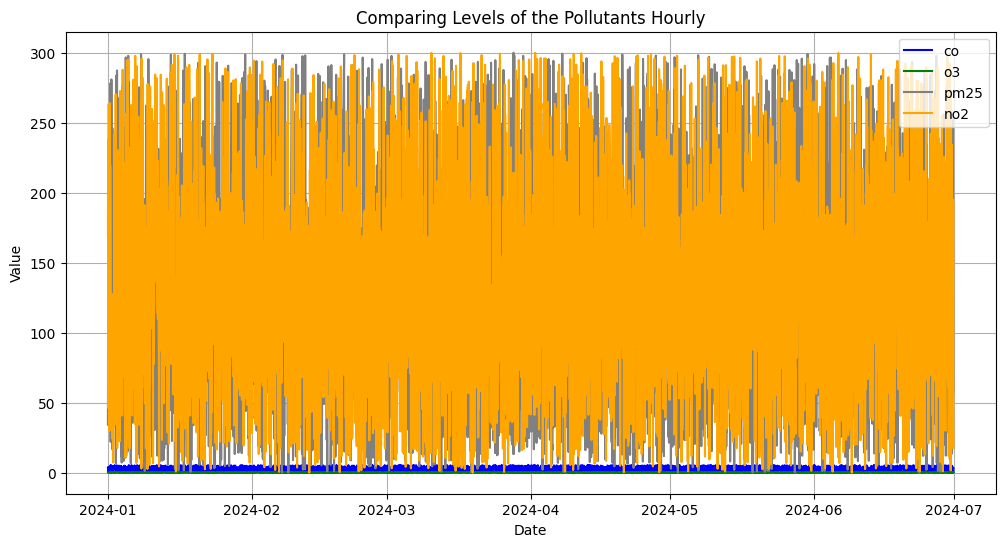

In [25]:
# comparing the level of each pollutant
# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = Davenport_Aqi, x='datetimeUtc', y='AQI_co', label='co', color='blue')
sns.lineplot(data = Davenport_Aqi, x='datetimeUtc', y='AQI_o3', label='o3', color='green')
sns.lineplot(data = Davenport_Aqi, x='datetimeUtc', y='AQI_pm25', label='pm25', color='grey')
sns.lineplot(data = Davenport_Aqi, x='datetimeUtc', y='AQI_no2', label='no2', color='orange')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing Levels of the Pollutants Hourly')
plt.legend()
plt.grid(True)
plt.show()

### Comparing the AQI level of pollutants resampled daily

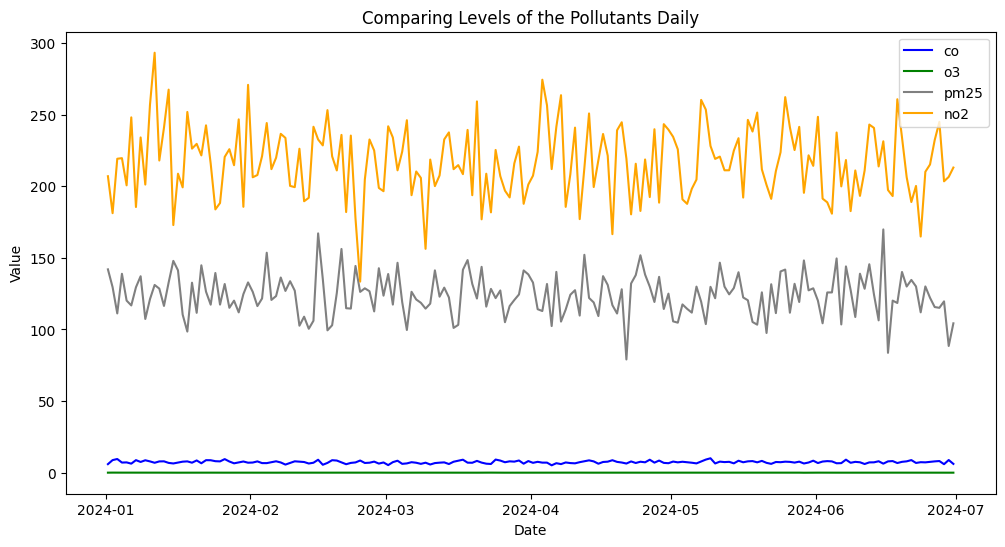

In [26]:
# Resampling the data to daily basis for a clearer view
Davenport_Aqi_resampled_daily = Davenport_Aqi.resample('D').mean()

# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = Davenport_Aqi_resampled_daily, x='datetimeUtc', y='co', label='co', color='blue')
sns.lineplot(data = Davenport_Aqi_resampled_daily, x='datetimeUtc', y='o3', label='o3', color='green')
sns.lineplot(data = Davenport_Aqi_resampled_daily, x='datetimeUtc', y='pm25', label='pm25', color='grey')
sns.lineplot(data = Davenport_Aqi_resampled_daily, x='datetimeUtc', y='no2', label='no2', color='orange')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing Levels of the Pollutants Daily')
plt.legend()
plt.show()

**CO (Carbon Monoxide)**: 
   - The levels of CO are consistently low throughout the period, with values remaining close to zero.
   
**O3 (Ozone)**:
   - The Ozone levels also remain quite low, similar to CO, showing very little variation over time.
   
**NO2 (Nitrogen Dioxide)**:
   - NO2 levels are much higher compared to CO and O3, showing significant fluctuations daily. The values range from about 150 to over 250.
   
**PM2.5 (Particulate Matter 2.5)**:
   - PM2.5 levels show considerable daily variation as well, with values ranging from about 50 to 150. There are periods of noticeable peaks and troughs.

**General Trends**:
- NO2 levels are consistently higher than PM2.5, CO, and O3.
- PM2.5 exhibits significant daily variability but remains lower than NO2.
- CO and O3 are relatively stable and low compared to the other pollutants.

This chart is useful for understanding the relative levels and variability of these pollutants over the given time period, highlighting that NO2 and PM2.5 are more variable and generally present at higher levels than CO and O3.

### Comparing AQI levels of pollutants resampled monthly

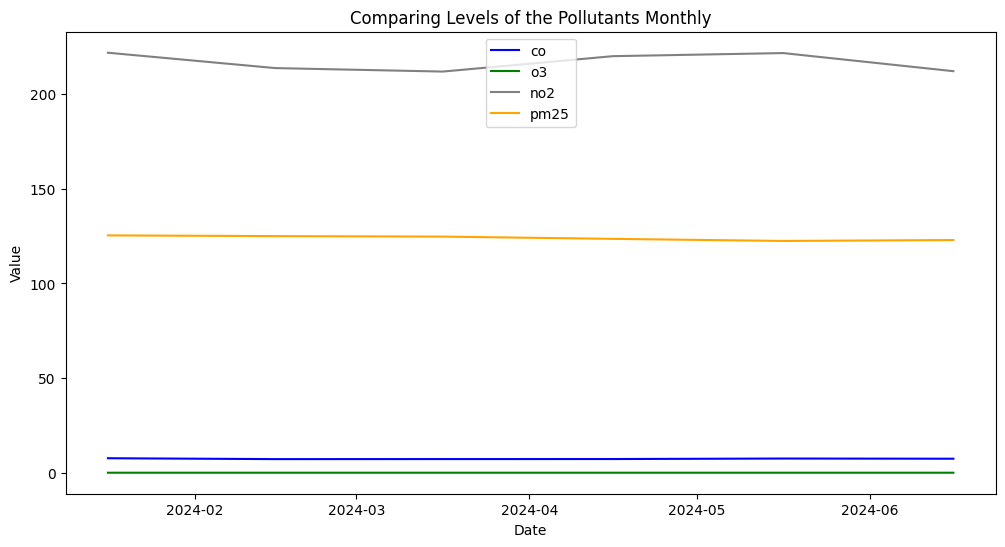

In [27]:
# resampling it to a monthly basis
Davenport_Aqi_resampled_monthly = Davenport_Aqi.resample('ME').mean()

# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = Davenport_Aqi_resampled_monthly, x='datetimeUtc', y='co', label='co', color='blue')
sns.lineplot(data = Davenport_Aqi_resampled_monthly, x='datetimeUtc', y='o3', label='o3', color='green')
sns.lineplot(data = Davenport_Aqi_resampled_monthly, x='datetimeUtc', y='no2', label='no2', color='grey')
sns.lineplot(data = Davenport_Aqi_resampled_monthly, x='datetimeUtc', y='pm25', label='pm25', color='orange')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing Levels of the Pollutants Monthly')
plt.legend()
plt.show()

### Resampled Data

In [28]:
result = adfuller(DavenPort_Table['o3'])
# print out hte results
print('ADF Statistics:', result[0])
print('p-value', result[1])
print('Critical Value:', result[4]) # type: ignore

ADF Statistics: -5.083309480992352
p-value 1.5143785046385264e-05
Critical Value: {'1%': -3.431864627292699, '5%': -2.8622092782958526, '10%': -2.567126261627658}


### Correlation Heatmap for the pollutants

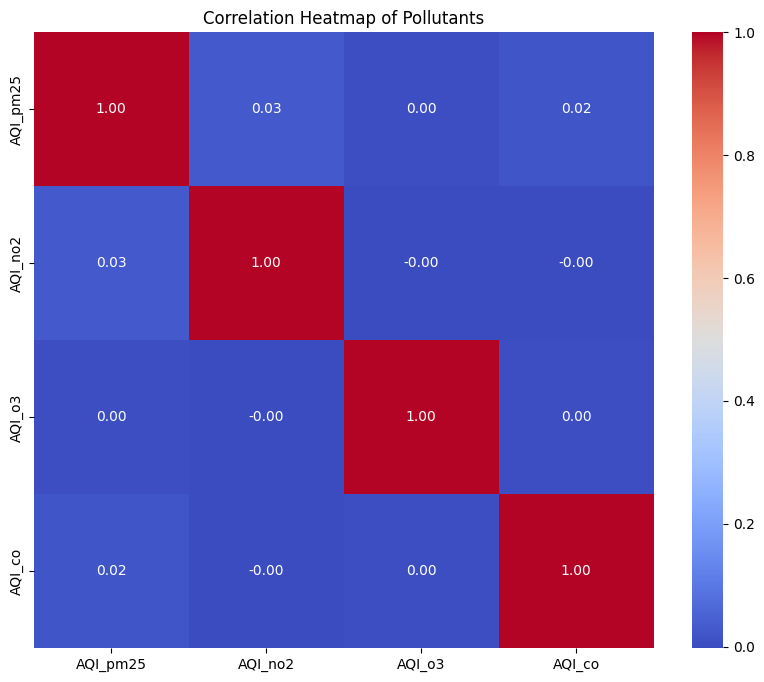

In [29]:
# correlation heatmap for the pollutants
# selecting the pollutants
pollutants = ['AQI_pm25', 'AQI_no2', 'AQI_o3', 'AQI_co']

# calculating the correlation matrix
corr_matrix = Davenport_Aqi[pollutants].corr()
# plotting a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap of Pollutants')
plt.show()

### Interpretation of the Correlation Heatmap:
### Interpretation of the Correlation Heatmap:

- **PM2.5 and no2:**
  - No significant correlation (-0.02), indicating independent changes.

- **PM2.5 and Other Pollutants:**
  - Very low correlations with CO (0.00) and O3 (0.01), suggesting independence.

- **no2and Other Pollutants:**
  - Very low correlations with o3 (-0.02) and co (0.00), indicating independence.

- **O3 and CO:**
  - Slightly negative but negligible correlation (-0.01), showing no significant relationship.

### A Lineplot for the AQI trends

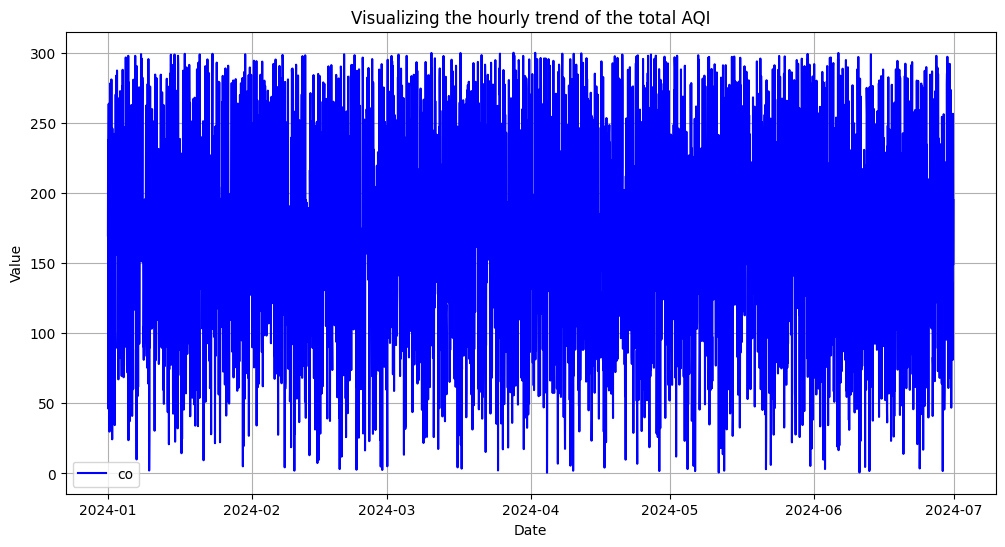

In [30]:
# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = Davenport_Aqi, x='datetimeUtc', y='AQI', label='co', color='blue')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Visualizing the hourly trend of the total AQI')
plt.legend()
plt.grid(True)
plt.show()

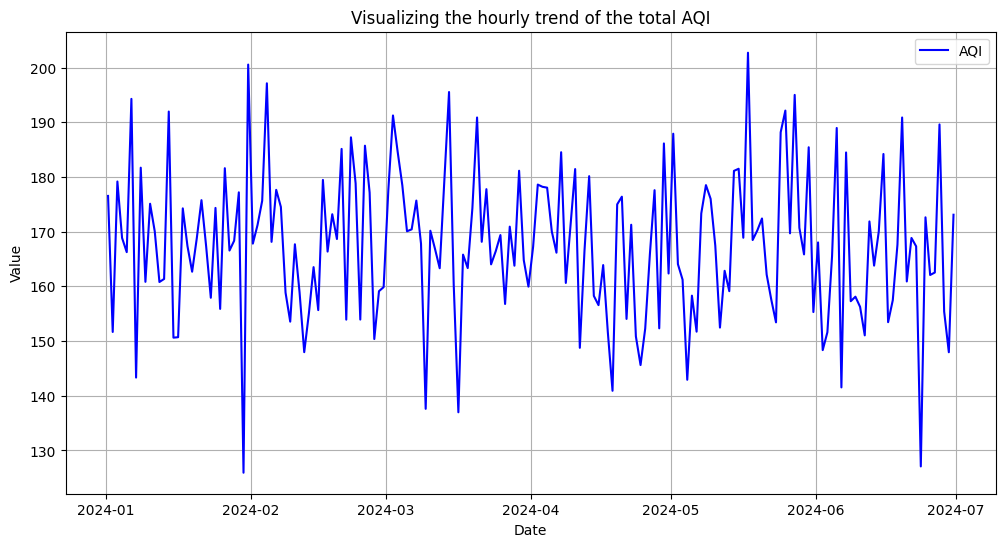

In [31]:
# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = Davenport_Aqi_resampled_daily, x='datetimeUtc', y='AQI', label='AQI', color='blue')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Visualizing the hourly trend of the total AQI')
plt.legend()
plt.grid(True)
plt.show()


- **High Variability**: The AQI values exhibit significant hourly fluctuations throughout the period, indicating that air quality changes frequently.
- **Frequent Peaks**: There are multiple peaks in the AQI above 190, suggesting periods of poorer air quality.
- **Better Quality Periods**: Troughs in the AQI around 140 to 150 indicate intervals of relatively better air quality.
- **Consistent Pattern**: Despite the fluctuations, the AQI consistently ranges between 130 and just above 200, showing a regular pattern of variability.
- **Need for Continuous Monitoring**: The dynamic nature of the AQI underscores the importance of continuous monitoring to effectively manage and understand air pollution levels.

## Detecting Seasonality using Additive Decomposition.
In this example, we will use the `additive_decomposition` function from the `statsmodels
The Additive decomposition separates the time series into trend, seasonal, and residual components assuming that the time series is equal to trend + seasonality + noise

#### Calculating the daily averages

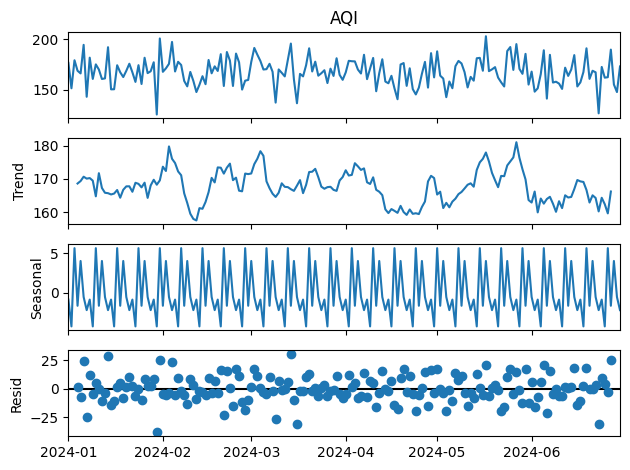

In [32]:
result = seasonal_decompose(Davenport_Aqi_resampled_daily['AQI'], model='additive')
result.plot()
plt.show()

**Observed Data (AQI)**:
   - This top plot shows the actual AQI values over time from January 2024 to June 2024.
   - The values fluctuate between 150 and 200, indicating variability in air quality.

 **Trend**:
   - The second plot illustrates the overall trend in the AQI data.
   - There is a noticeable downward trend from January to April, followed by a slight upward trend from May to June.

 **Seasonal Component**:
   - The third plot shows the seasonal variations in the AQI data.
   - This component reveals regular, repeating patterns within each month, highlighting periodic fluctuations in the AQI values.

**Residuals (Resid)**:
   - The bottom plot displays the residuals, which represent the remaining variability in the AQI data after removing the trend and seasonal components.
   - The residuals appear to be randomly distributed around zero, indicating that the model has captured the main patterns in the data.

### Key Points:
- **Observed AQI Fluctuations**: The AQI values fluctuate significantly, showing periods of both high and low air quality.
- **Overall Trend**: The AQI trend shows a decrease from January to April, followed by a slight increase towards June.
- **Seasonal Patterns**: Regular monthly patterns are observed, indicating consistent periodic fluctuations in AQI levels.
- **Residual Analysis**: The residuals are randomly distributed, suggesting that the trend and seasonal components effectively capture the main variations in the AQI data.

 ###  Creating Subplots for the Daily AQI Levels

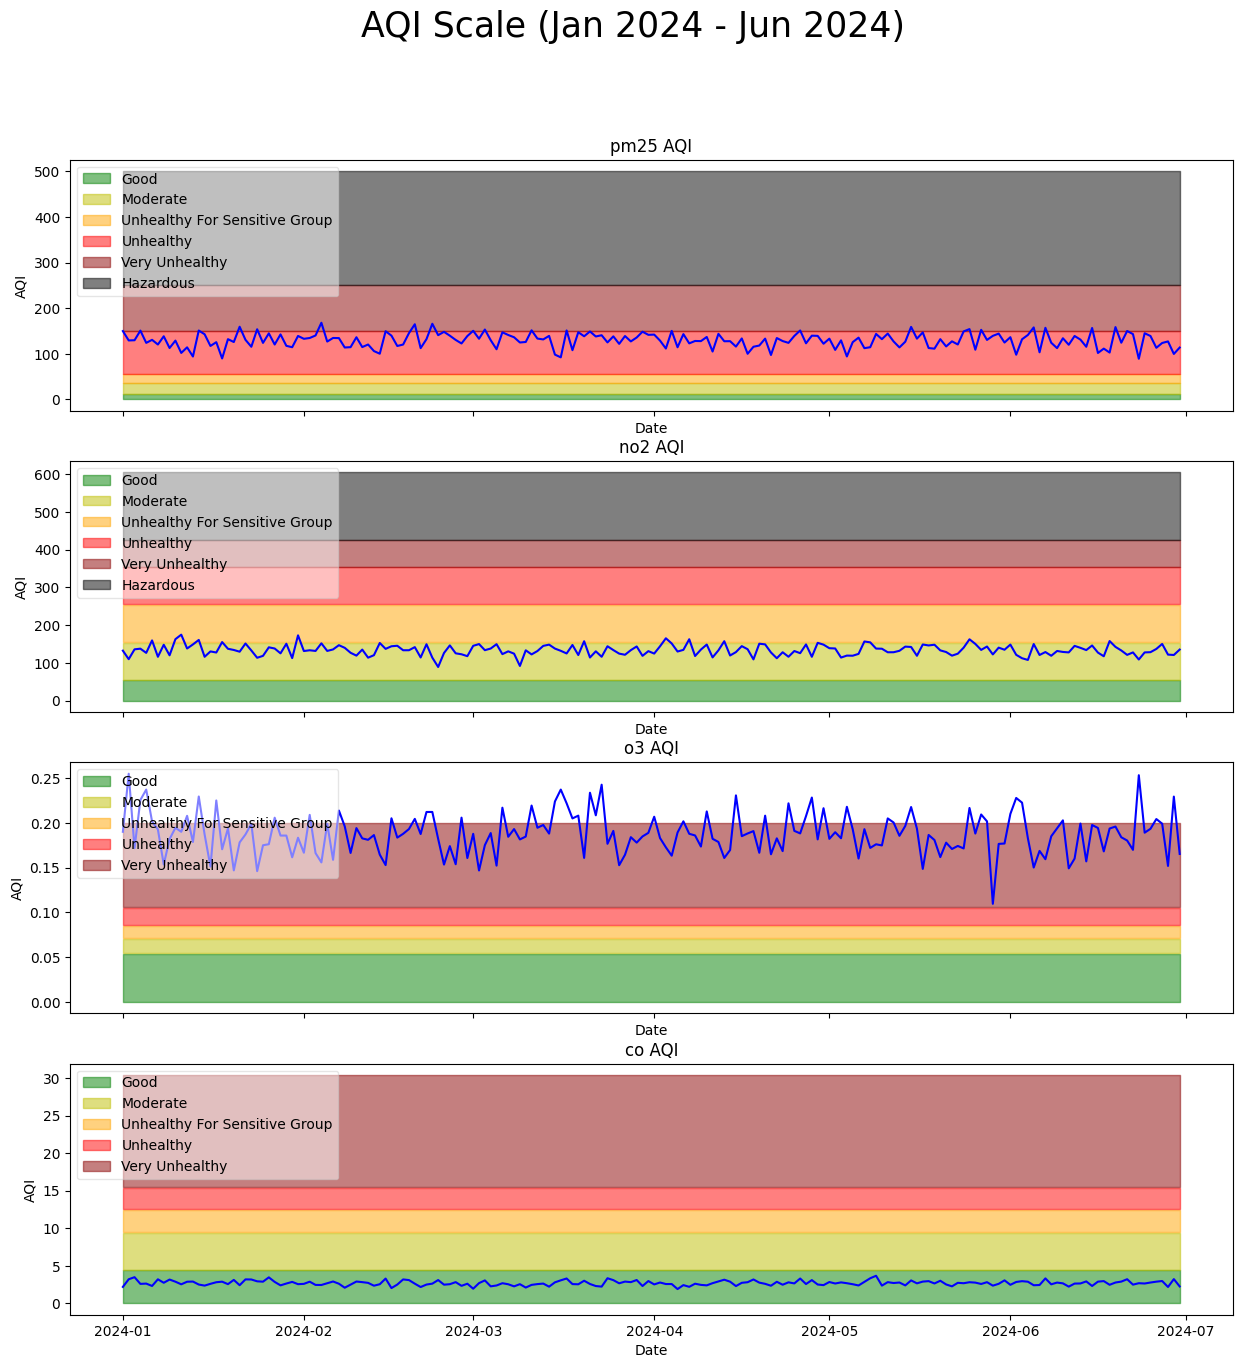

In [33]:
# create a breakpoint dictionary
breakpoints = {
    'pm25': [(0.0, 42.0, 0, 50), (42.1, 84.0, 51, 100), (84.1, 126.0, 101, 150), (126.1, 168.0, 151, 200), (168.1, 210.0, 201, 300)],
    'no2': [(0.0, 54.0, 0, 50), (55.1, 154.0, 51, 100), (155.0, 254.0, 101, 150), (255.0, 354.0, 151, 200), (355.0, 424.0, 201, 300)],
    'o3': [(0.0, 26.67, 0, 50), (26.68, 53.33, 51, 100), (53.34, 80.0, 101, 150), (80.01, 106.67, 151, 200), (106.68, 133.33, 201, 300), (133.34, 160.0, 301, 500)],
    'co': [(0.0, 138.3, 0, 50), (138.4, 276.6, 51, 100), (276.7, 414.9, 101, 150), (415.0, 553.2, 151, 200), (553.3, 691.5, 201, 300), (691.6, 830.0, 301, 500)]
}

def index_scale(plotnumber, data, pollutant):
    if pollutant == 'pm25':
        scales = [(0, 12, 'Good', 'g'), (12.1, 35.4, 'Moderate', 'y'), (35.5, 55.4, 'Unhealthy For Sensitive Group', 'orange'),
                  (55.5, 150.4, 'Unhealthy', 'r'), (150.5, 250.4, 'Very Unhealthy', 'darkred'), (250.5, 500.4, 'Hazardous', 'black')]
    elif pollutant == 'no2':
        scales = [(0, 54, 'Good', 'g'), (55, 154, 'Moderate', 'y'), (155, 254, 'Unhealthy For Sensitive Group', 'orange'),
                  (255, 354, 'Unhealthy', 'r'), (355, 424, 'Very Unhealthy', 'darkred'), (425, 604, 'Hazardous', 'black')]
    elif pollutant == 'o3':
        scales = [(0.000, 0.054, 'Good', 'g'), (0.055, 0.070, 'Moderate', 'y'), (0.071, 0.085, 'Unhealthy For Sensitive Group', 'orange'),
                  (0.086, 0.105, 'Unhealthy', 'r'), (0.106, 0.200, 'Very Unhealthy', 'darkred')]
    elif pollutant == 'co':
        scales = [(0.0, 4.4, 'Good', 'g'), (4.5, 9.4, 'Moderate', 'y'), (9.5, 12.4, 'Unhealthy For Sensitive Group', 'orange'),
                  (12.5, 15.4, 'Unhealthy', 'r'), (15.5, 30.4, 'Very Unhealthy', 'darkred')]
    
    for scale in scales:
        axs[plotnumber].fill_between(x=data.index, y1=scale[0], y2=scale[1], alpha=0.5, label=scale[2], color=scale[3])
    axs[plotnumber].set_title(f'{pollutant} AQI')
    axs[plotnumber].legend(loc='upper left', framealpha=0.5)
    axs[plotnumber].set_xlabel('Date')
    axs[plotnumber].set_ylabel('AQI')

# Create subplots to visualize the AQI data from January to June 2024
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(15, 15))
fig.suptitle('AQI Scale (Jan 2024 - Jun 2024)', fontsize=25)
pollutants = ['pm25', 'no2', 'o3', 'co']

for i, pollutant in enumerate(pollutants):
    axs[i].plot(Davenport_Aqi_resampled_daily[f'AQI_{pollutant}'], color='blue')
    index_scale(i, Davenport_Aqi_resampled_daily, pollutant)

plt.show()


### Detailed Interpretation:

**PM2.5 AQI**:
   - **Trend**: The PM2.5 levels mostly stay within the "Moderate" and "Unhealthy for Sensitive Groups" categories.
   - **AQI Range**: Values fluctuate mostly between 50 and 150, rarely reaching above this range.

**NO2 AQI**:
   - **Trend**: The NO2 levels consistently fall within the "Moderate" and "Unhealthy for Sensitive Groups" categories.
   - **AQI Range**: Values range between 50 and 150, indicating moderate to unhealthy air quality for sensitive groups.

**O3 AQI**:
   - **Trend**: The O3 levels remain primarily within the "Good" and "Moderate" categories, occasionally touching the "Unhealthy for Sensitive Groups" category.
   - **AQI Range**: The values are generally low, fluctuating between 0.1 and 0.2.

**CO AQI**:
   - **Trend**: The CO levels stay well within the "Good" category throughout the period.
   - **AQI Range**: The values are consistently low, ranging from 0 to 5, indicating good air quality.

### General Observations:
- **PM2.5 and NO2** show more variability and occasionally reach higher AQI values, indicating moderate to unhealthy conditions for sensitive groups.
- **O3 and CO** levels are relatively low and stable, indicating better air quality.
- The color-coded backgrounds help visualize the air quality categories for each pollutant, providing a clear representation of when the air quality is good, moderate, or unhealthy for sensitive groups.

### Key Points:
- **PM2.5** and **NO2** are the more concerning pollutants, often reaching levels that could be unhealthy for sensitive groups.
- **O3** and **CO** levels are generally within safe limits, indicating good air quality.
- The color-coded AQI scale helps in quickly identifying the air quality status for each pollutant over the given period.

### Comparing the Levels of the pollutant in Davenport

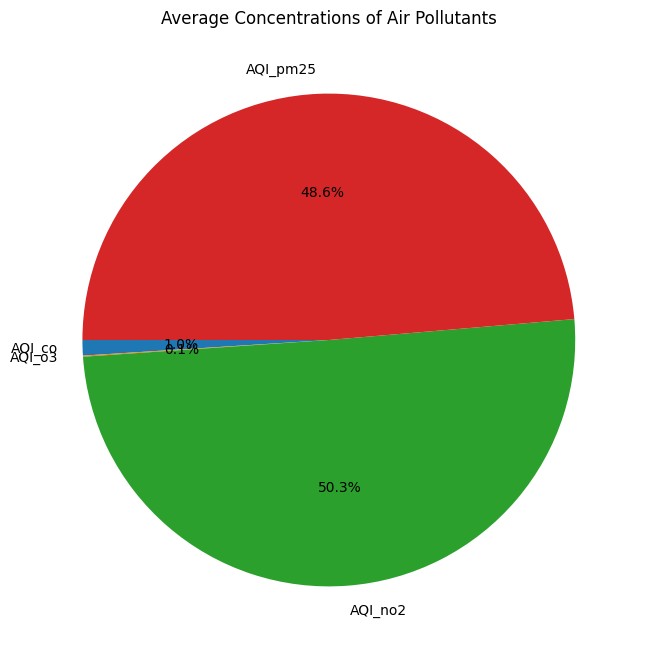

In [34]:
# creating a piechart to comare the levels of the pollutants

# Calculate average values
average_values = Davenport_Aqi[['AQI_co', 'AQI_o3', 'AQI_no2', 'AQI_pm25']].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(average_values, labels=average_values.index, autopct='%1.1f%%', startangle=180) # type: ignore
plt.title('Average Concentrations of Air Pollutants')
plt.show()
        

### Detailed Interpretation:

**AQI_no2**:
   - This section of the pie chart, colored green, represents Nitrogen Dioxide (NO2).
   - NO2 accounts for 50.2% of the total AQI, indicating it is the most significant pollutant in terms of concentration.

 **AQI_pm25**:
   - This section, colored red, represents Particulate Matter 2.5 (PM2.5).
   - PM2.5 accounts for 48.7% of the total AQI, making it the second most significant pollutant.

**AQI_o3**:
   - This small section, colored a lighter blue, represents Ozone (O3).
   - O3 accounts for 0.3% of the total AQI, indicating a very low average concentration compared to NO2 and PM2.5.

**AQI_co**:
   - This very small section, colored a darker blue, represents Carbon Monoxide (CO).
   - CO accounts for 0.8% of the total AQI, showing it also has a very low average concentration.

### Key Points:
- **NO2 and PM2.5 Dominance**: Together, NO2 and PM2.5 make up nearly 99% of the total AQI, indicating that these two pollutants are the primary contributors to air pollution in the observed period.
- **Low O3 and CO**: Ozone (O3) and Carbon Monoxide (CO) contribute minimally to the total AQI, with less than 1% each.

### Conclusion:
This pie chart provides a clear visual representation of the average contributions of different pollutants to the overall AQI. It highlights the significant impact of NO2 and PM2.5 on air quality, while O3 and CO have a negligible contribution in comparison.